# Real or Not? NLP with Disaster Tweets

### 과연 Tweet의 게시물들이 정말로 disaster를 나타낸건지 아닌지 구별하는 것!

In [1]:
import pandas as pd
import numpy as np
import os
#os.chdir(r'../')
import matplotlib.pyplot as plt
import seaborn as sns
import string

import warnings
warnings.filterwarnings("ignore")

# Data Load

In [2]:
for dirname, _, filenames in os.walk('./nlp-getting-started'):
    for filename in filenames :
        print(os.path.join(dirname, filename))

./nlp-getting-started\sample_submission.csv
./nlp-getting-started\test.csv
./nlp-getting-started\train.csv


In [3]:
train = pd.read_csv("./nlp-getting-started/train.csv")
test = pd.read_csv("./nlp-getting-started/test.csv")
sub_sample = pd.read_csv("./nlp-getting-started/sample_submission.csv")

print(train.shape, test.shape, sub_sample.shape)

(7613, 5) (3263, 4) (3263, 2)


In [4]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Exploring the Target Column

In [14]:
train.duplicated().sum()
train = train.drop_duplicates().reset_index(drop=True)

There are 0 duplicated rows.

### Class Balance

Visulaization 1)

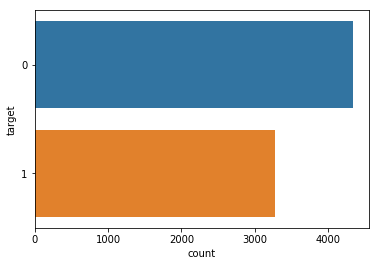

In [15]:
# Class Balance
train['target'].value_counts(normalize=True)
sns.countplot(y=train.target);

Visualization 2)

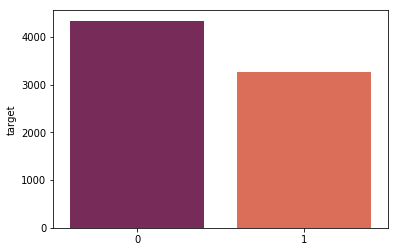

In [12]:
sns.barplot(train['target'].value_counts().index, train['target'].value_counts(), palette='rocket')

In [11]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [17]:
train.groupby('keyword').count()

,id,location,text,target
keyword,,,,
ablaze,36,29,36,36
accident,35,28,35,35
aftershock,34,25,34,34
airplane%20accident,35,29,35,35
ambulance,38,26,38,38
annihilated,34,20,34,34
annihilation,29,18,29,29
apocalypse,32,17,32,32
armageddon,42,32,42,42


In [13]:
train.groupby('location').count()

,id,keyword,text,target
location,,,,
,1,1,1,1
Glasgow,1,1,1,1
"Melbourne, Australia",1,1,1,1
News,1,1,1,1
å_,1,1,1,1
45å¡ 5'12.53N 14å¡ 7'24.93E,1,1,1,1
"616 Û¢ Kentwood , MI",1,1,1,1
? ??????? ? ( ?? å¡ ? ? ? å¡),1,1,1,1
?currently writing a book?,1,1,1,1


In [23]:
#NA data
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [47]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Keywords

In [22]:
#Check number of unique keywords, and whether they are the same for train and test sets
print(train.keyword.nunique(), test.keyword.nunique())

221 221


In [67]:
train.keyword.value_counts().iloc[:15].index

Index(['fatalities', 'armageddon', 'deluge', 'sinking', 'harm', 'body%20bags',
       'damage', 'collided', 'twister', 'windstorm', 'outbreak', 'fear',
       'evacuate', 'siren', 'earthquake'],
      dtype='object')

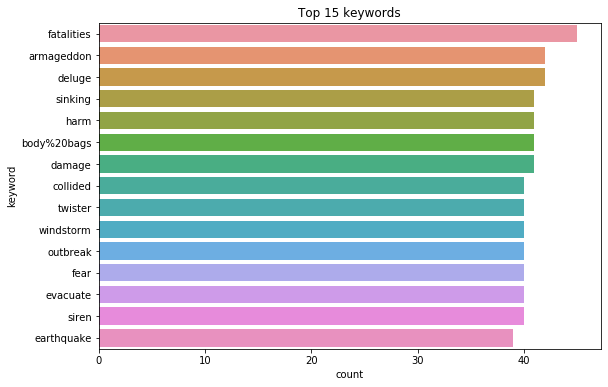

In [69]:
# Most common Keywords
plt.figure(figsize = (9,6))
sns.countplot(y=train.keyword, order=train.keyword.value_counts().iloc[:15].index)
plt.title("Top 15 keywords")
plt.show()

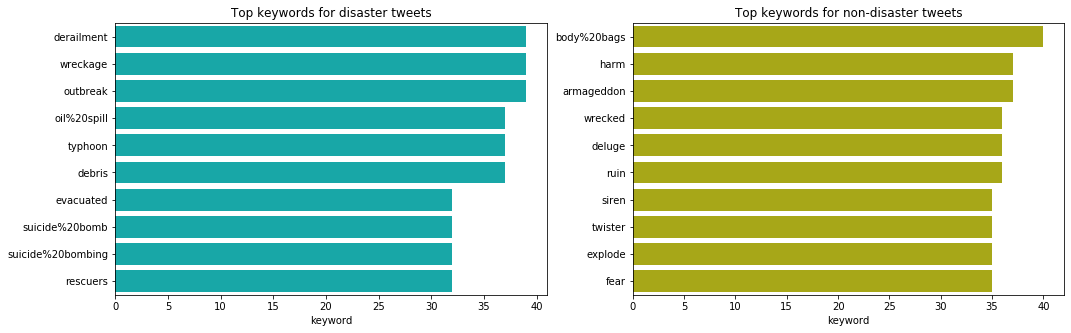

In [84]:
kw_d = train[train.target==1].keyword.value_counts().head(10)
kw_nd = train[train.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(17,5))
plt.subplot(121)
sns.barplot(kw_d, kw_d.index, color='c')
plt.title('Top keywords for disaster tweets')
plt.subplot(122)
sns.barplot(kw_nd, kw_nd.index, color='y')
plt.title('Top keywords for non-disaster tweets')
plt.show()

There is no common top 10 keywords between disaster and non-disaster tweets.

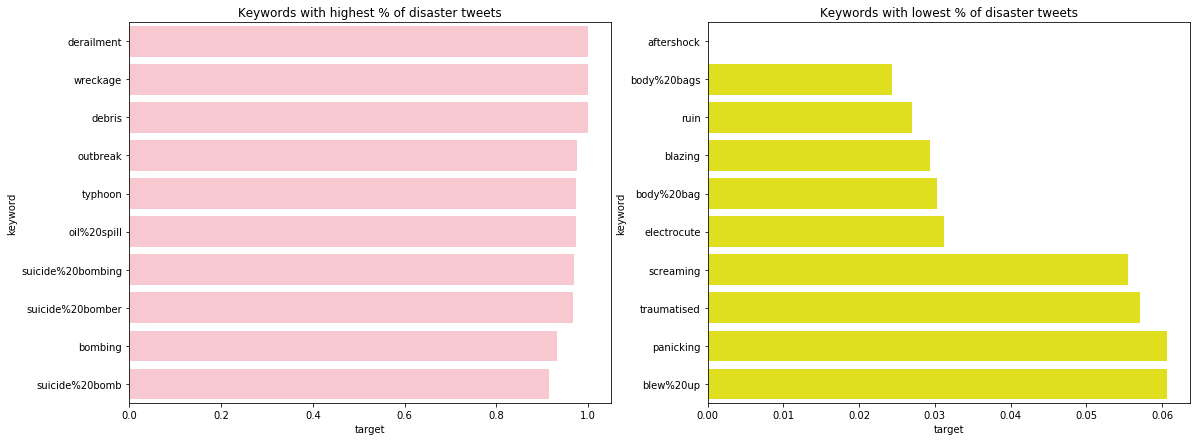

In [99]:
top_d = train.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10)
top_nd = train.groupby('keyword').mean()['target'].sort_values().head(10)

plt.figure(figsize=(19,7))
plt.subplot(121)
sns.barplot(top_d, top_d.index, color='pink')
plt.title('Keywords with highest % of disaster tweets')
plt.subplot(122)
sns.barplot(top_nd, top_nd.index, color='yellow')
plt.title('Keywords with lowest % of disaster tweets')
plt.show()

# Location

In [23]:
print(train.location.nunique(), test.location.nunique())

3341 1602


In [22]:
train.location.value_counts().iloc[:15].index

Index(['USA', 'New York', 'United States', 'London', 'Canada', 'Nigeria', 'UK',
       'Los Angeles, CA', 'India', 'Mumbai', 'Washington, DC', 'Kenya',
       'Worldwide', 'Australia', 'Chicago, IL'],
      dtype='object')

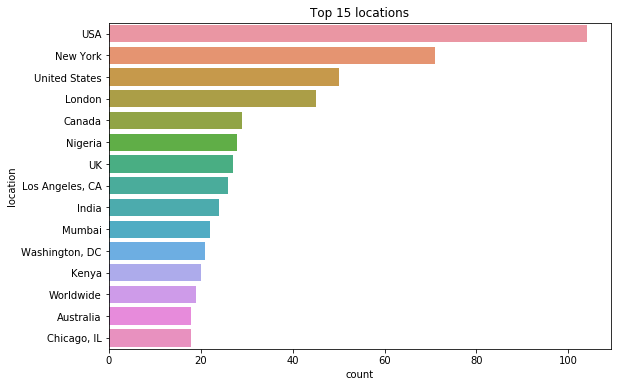

In [25]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y=train.location, order=train.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

the data is not clean, see both 'USA' and 'United States' in top locations.

In [43]:
train.location.value_counts()

USA                                       104
New York                                   71
United States                              50
London                                     45
Canada                                     29
Nigeria                                    28
UK                                         27
Los Angeles, CA                            26
India                                      24
Mumbai                                     22
Washington, DC                             21
Kenya                                      20
Worldwide                                  19
Australia                                  18
Chicago, IL                                18
California                                 17
New York, NY                               15
Everywhere                                 15
California, USA                            15
San Francisco                              14
Florida                                    14
United Kingdom                    

In [44]:
train[train.location.isin(top_loc)]

,id,keyword,location,text,target
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
51,74,ablaze,India,Man wife get six years jail for setting ablaze...,1
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,1
66,95,ablaze,San Francisco,@ablaze what time does your talk go until? I d...,0
70,100,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,0
73,105,accident,Australia,BigRigRadio Live Accident Awareness,1
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously die...,1
124,178,aftershock,United States,&gt;&gt; $15 Aftershock : Protect Yourself and...,0
148,212,airplane%20accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Fa...,1
158,226,airplane%20accident,Canada,DTN Brazil: Experts in France begin examining ...,1


look at % of disaster tweets for common locations

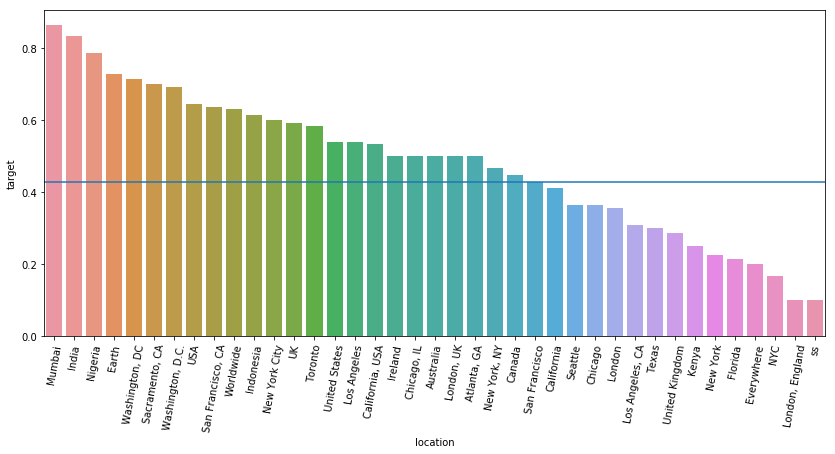

In [32]:
# location의 label 갯수를 큰 값부터 나열
raw_loc = train.location.value_counts()
# list로 만든다.
top_loc = list(raw_loc[raw_loc>=10].index)
# isin 구문은 열이 list의 값들을 포함하고 있는 모든 행들을 골라낼 때 주로 쓰인다. 
top_only = train[train.location.isin(top_loc)]

top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l.index, y=top_l)
# target의 평균값을 수평선으로 추가 
plt.axhline(np.mean(train.target))
# xticks : x축에 있는 label의 글씨를 rotation(각)을 통해 어떻게 표시할 지 
plt.xticks(rotation=80)
plt.show()

The top 3 locations with highest % of disaster tweets are Mumbai, Inida, and Nigeria.  
As the location data is not clean, we see some interesting cases,   
such as 'London, UK' saw a higher-than-average % of disaster tweets, but 'London' is below average.  
  
We try to clean up the location and see if there is any difference:

# Text Data Pre-Processing

In [ ]:
# Fill NA values
for col in ['keyword', 'location']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

def clean_loc(x):
    if x == 'None':
        return 'None'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'

##### Data Cleaning  

- Removing Noise
- Tokenization
- Stopword Removal  

More data cleaning steps after tokenizations:  

- Stemming  

- Lemmatization   

In [ ]:
# Applying a first round of text cleaning techniques


# Reference

- https://www.kaggle.com/aaroha33/disaster-tweets-evaluation-with-nlp
- https://www.kaggle.com/parulpandey/getting-started-with-nlp-a-general-intro  
- https://www.kaggle.com/ratan123/disaster-tweets-understanding-data-basic-model  
- https://www.kaggle.com/sahib12/nlp-starter-for-beginners